In [ ]:
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Mount your Google Drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Create a folder to save the images in your Google Drive
folder_name = "plant_images"
folder_path = f"/content/drive/MyDrive/{folder_name}"
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [ ]:
# Read the "Files and Filessensor type" sheet from the XLSX file into a pandas DataFrame
##The file used for extracting the plant images is Schema types which is already uploaded on Github
xlsx_path = "/content/drive/MyDrive/Dataset Plants/schema types.xlsx"
df = pd.read_excel(xlsx_path, sheet_name="files and filesensor types")

In [ ]:
# Iterate through each row in the DataFrame
for index, row in df[df['sensor/sensorType']=='PNG_RGB'].iterrows():
    # Extract the image URL and date/time stamp from the current row
    image_url = row["url"]
    date_time = row["timestampIso"] # Extracting the date and time from TimestampIso column

    # Use the requests library to download the image from the URL
    response = requests.get(image_url)

    # Use the PIL library to open the image from the downloaded data
    img = Image.open(BytesIO(response.content))

    # Create a file name based on the date and time stamp from the CSV file
    file_name = f"{date_time}.png"

    # Save the image to the folder in your Google Drive with the unique file name
    img.save(os.path.join(folder_path, file_name))

    # Add the filename to a new column in the DataFrame
    df.loc[index, 'filename'] = file_name

In [ ]:
# Save the updated DataFrame to a new Excel file
output_xlsx_path = "/content/drive/MyDrive/your_output_dataset.xlsx"
df.to_excel(output_xlsx_path, index=False)

In [ ]:
import zipfile
import os

In [ ]:
# Define the path of the folder containing the downloaded images
folder_path = "/content/drive/MyDrive/plant_images"


In [ ]:
# Define the path and name of the ZIP file to be created
zip_path = "/content/drive/MyDrive/plant_images.zip"

In [ ]:
# Create a ZIP file object with write permission
with zipfile.ZipFile(zip_path, 'w', zipfile.ZIP_DEFLATED) as zip_file:
    
    # Iterate through each file in the folder and add it to the ZIP file
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        zip_file.write(file_path, arcname=file_name)
# Print a message indicating that the ZIP file was created successfully
print(f"ZIP file created successfully at {zip_path}")

ZIP file created successfully at /content/drive/MyDrive/plant_images.zip


In [ ]:
folder_name = "plant_images"

In [ ]:
# Get the list of file names in the folder
file_names = os.listdir(folder_path)

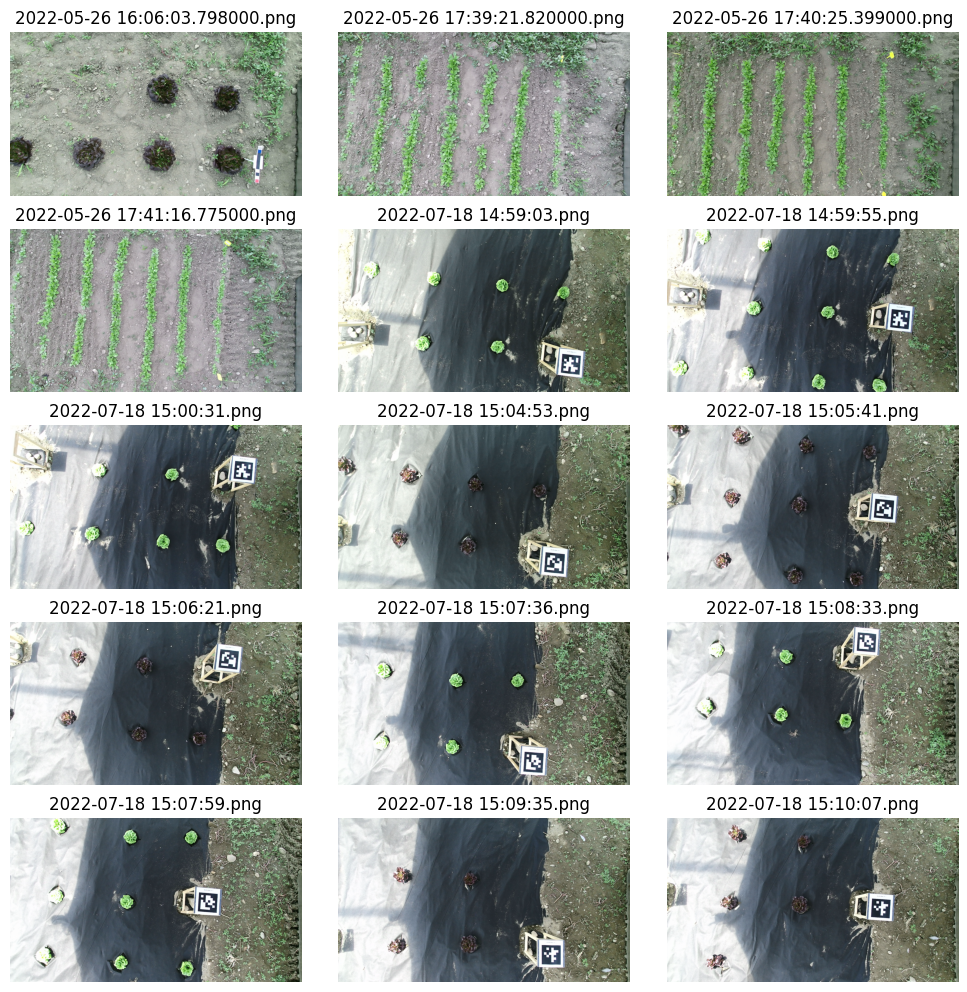

In [ ]:
# Plot the images in a grid
fig, axs = plt.subplots(nrows=5, ncols=3, figsize=(10, 10))
for i, file_name in enumerate(file_names[:15]):
    # Load the image and plot it in the corresponding subplot
    img = plt.imread(os.path.join(folder_path, file_name))
    row, col = divmod(i, 3)
    axs[row, col].imshow(img)
    axs[row, col].axis("off")
    axs[row, col].set_title(file_name)

plt.tight_layout()
plt.show()

In [ ]:

import cv2


In [ ]:
# Read the Excel file
df_1 = pd.read_excel('/content/drive/MyDrive/your_output_dataset.xlsx')

In [ ]:
#Deleting the rows with Sensor type PCD since it contains MATLAB code
df_1 = df_1.loc[df_1['sensor/sensorType'] != 'PCD']

In [ ]:
#Check the size of df
print(df_1.shape)

(251, 16)


In [ ]:
print(df_1.dtypes)

id                            object
timestampIso          datetime64[ns]
sensor/id                     object
sensor/desc                  float64
sensor/sensorType             object
location/id                    int64
insertionAgent                object
insertionTimestamp    datetime64[ns]
url                           object
urlThumbnail                  object
urlToPly                      object
timestampUnix                  int64
Column13                     float64
Column14                     float64
Column15                     float64
filename                      object
dtype: object


In [ ]:
print(df_1.columns)

Index(['id', 'timestampIso', 'sensor/id', 'sensor/desc', 'sensor/sensorType',
       'location/id', 'insertionAgent', 'insertionTimestamp', 'url',
       'urlThumbnail', 'urlToPly', 'timestampUnix', 'Column13', 'Column14',
       'Column15', 'filename'],
      dtype='object')


In [ ]:
distinct_locations = df_1['location/id'].unique()
print(distinct_locations)

[  8  26  27  28  29  31  32 101 102 103 104]


In [ ]:
distinct_timestampIso = df_1['timestampIso'].unique()
print(distinct_timestampIso)

In [ ]:
specific_date = 26
num_records = df_1.loc[df_1['location/id'] == specific_date].shape[0]
print(f"There are {num_records} records for {specific_date} in df_1.")

There are 24 records for 26 in df_1.


In [ ]:
# Filter based on location
df_filtered = df_1.loc[df_1['location/id'] == 26]

In [ ]:
print(len(df_filtered))

24


In [ ]:
with ZipFile('/content/drive/MyDrive/plant_images.zip') as archive:
     print(archive.namelist())

['2022-05-26 16:06:03.798000.png', '2022-05-26 17:39:21.820000.png', '2022-05-26 17:40:25.399000.png', '2022-05-26 17:41:16.775000.png', '2022-07-18 14:59:03.png', '2022-07-18 14:59:55.png', '2022-07-18 15:00:31.png', '2022-07-18 15:04:53.png', '2022-07-18 15:05:41.png', '2022-07-18 15:06:21.png', '2022-07-18 15:07:36.png', '2022-07-18 15:08:33.png', '2022-07-18 15:07:59.png', '2022-07-18 15:09:35.png', '2022-07-18 15:10:07.png', '2022-07-18 15:10:40.png', '2022-07-18 15:28:29.png', '2022-07-18 15:29:14.png', '2022-07-18 15:29:36.png', '2022-07-18 15:30:39.png', '2022-07-18 15:31:03.png', '2022-07-18 15:31:33.png', '2022-07-18 15:32:22.png', '2022-07-18 15:32:45.png', '2022-07-18 15:33:06.png', '2022-07-18 15:34:11.png', '2022-07-18 15:35:46.png', '2022-07-18 15:37:11.png', '2022-07-22 14:04:46.png', '2022-07-22 14:05:53.png', '2022-07-22 14:06:31.png', '2022-07-22 14:08:29.png', '2022-07-22 14:08:00.png', '2022-07-22 14:09:07.png', '2022-07-22 14:10:17.png', '2022-07-22 14:10:45.png',

In [ ]:

import io
import urllib.request
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
# select only the rows with location 26 and timestamp between 2022-07-18T00:00:00 and 2022-07-18T23:59:00
df_filtered = df_1.loc[(df_1['location/id'] == 26) & 
                     (df_1['timestampIso'] >= '2022-07-18T00:00:00') & 
                     (df_1['timestampIso'] <= '2022-07-18T23:59:00')]
                     #16:57:44.358000000

In [ ]:
print(len(df_filtered))

6


In [ ]:
print(df_filtered.columns)

Index(['id', 'timestampIso', 'sensor/id', 'sensor/desc', 'sensor/sensorType',
       'location/id', 'insertionAgent', 'insertionTimestamp', 'url',
       'urlThumbnail', 'urlToPly', 'timestampUnix', 'Column13', 'Column14',
       'Column15', 'filename'],
      dtype='object')


In [ ]:
# create a dictionary mapping the filename to the corresponding image data
image_data_dict = {}
with zipfile.ZipFile('/content/drive/MyDrive/plant_images.zip') as zip_file:
    for filename in df_filtered['filename']:
        with zip_file.open(filename) as image_file:
            image_data = io.BytesIO(image_file.read())
            image_data_dict[filename] = image_data

In [ ]:
# Create a list of image filenames to display
image_filenames = df_filtered['filename'].tolist()

In [ ]:
df_filtered['filename'].unique()

array(['2022-07-18 14:59:03.png', '2022-07-18 14:59:55.png',
       '2022-07-18 15:00:31.png', '2022-07-18 15:34:11.png',
       '2022-07-18 15:35:46.png', '2022-07-18 15:37:11.png'], dtype=object)

In [ ]:
# Open the zip file containing the images
zip_file = zipfile.ZipFile('/content/drive/MyDrive/plant_images.zip')

In [ ]:
(len(image_filenames))

12

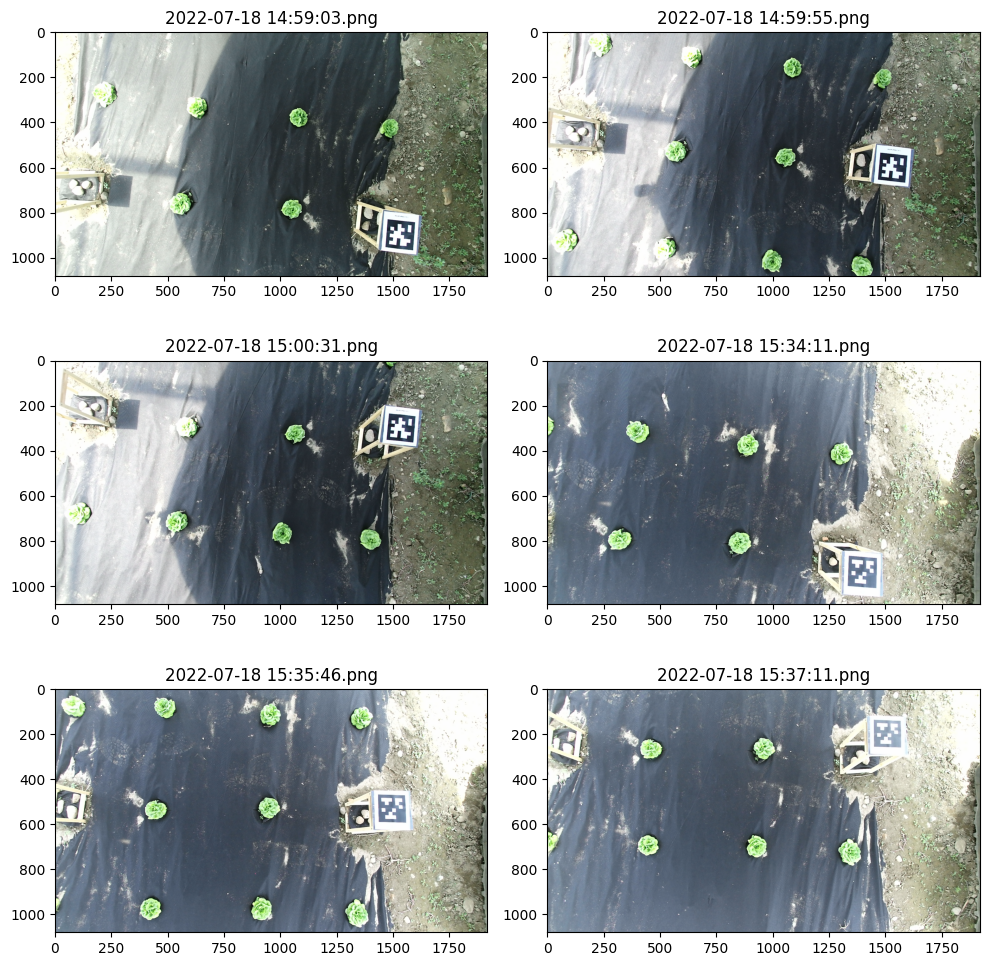

In [ ]:
# Create a 3x3 grid of subplots to display the images
fig, axs = plt.subplots(3, 2, figsize=(10, 10))

# Loop through the image filenames and display each image in a subplot
for i, image_filename in enumerate(image_filenames):
    # Check if the filename is not NaN before trying to access the image
    if not pd.isna(image_filename):
        # Extract the image from the zip file and open it
        image_data = zip_file.read(image_filename)
        image = Image.open(io.BytesIO(image_data))

        # Compute the row and column index of the subplot
        row = i // 2
        col = i % 2

        # Display the image and its filename in the subplot
        axs[row, col].imshow(image)
        axs[row, col].set_title(image_filename)

# Adjust the spacing between subplots and display the plot
fig.tight_layout()
plt.show()

In [ ]:
# Create a pivot table that shows the count of records for each combination of timestamp and location
table = pd.pivot_table(df_1, values='filename', index='timestampIso', columns='location/id', aggfunc='count', fill_value=0)

In [ ]:
# Create a summary table that shows the counts for all combinations of timestamp and location
summary_table = pd.DataFrame({'count': table.unstack()}).reset_index()

In [ ]:
# Rename the columns for better readability
summary_table = summary_table.rename(columns={'level_0': 'location/id', 'timestampIso': 'date'})

In [ ]:
# Display the summary table
print(summary_table)

      location/id                    date  count
0               8 2022-05-26 16:06:03.798      1
1               8 2022-05-26 17:39:21.820      1
2               8 2022-05-26 17:40:25.399      1
3               8 2022-05-26 17:41:16.775      1
4               8 2022-07-18 14:59:03.000      0
...           ...                     ...    ...
2756          104 2022-11-22 15:49:02.642      0
2757          104 2022-11-22 15:49:17.385      0
2758          104 2022-11-22 15:49:36.691      0
2759          104 2022-11-22 15:49:49.818      0
2760          104 2022-11-22 15:50:03.703      0

[2761 rows x 3 columns]


In [ ]:
df_original = pd.read_excel('/content/drive/MyDrive/Dataset Plants/schema types.xlsx', sheet_name='locations type')

In [ ]:
# Extract the required columns (id and plant name)
df_location = df_original[['id', 'name']]

In [ ]:
df_location.head()

id name
0             23  NaN
1             28  NaN
2  test-location  NaN
3     t_location  NaN
4             29  NaN

In [ ]:
df_location.shape

(39, 2)

In [ ]:
df_location['name'].unique()

In [ ]:
# Read in the downloaded Excel file
df_downloaded = pd.read_excel('/content/drive/MyDrive/your_output_dataset.xlsx')

In [ ]:
# Merge the location details with the downloaded Excel file
df_merged = pd.merge(df_downloaded, df_location, left_on='location/id', right_on='id')


In [ ]:
# Save the merged DataFrame as a new Excel file
df_merged.to_excel('dwp.xlsx', index=False)

In [ ]:
df_merged['name'].unique()

array(['Lattuga salanova', nan, 'Lattuga salanova rossa'], dtype=object)

Performing pre processing of Images

In [ ]:
# Import necessary libraries
import cv2
import numpy as np
import os
import zipfile

In [ ]:
# Define the path to the zipped image folder
zip_folder = "/content/drive/MyDrive/plant_images.zip"

In [ ]:
# Extract the images from the zipped folder to a temporary directory
with zipfile.ZipFile(zip_folder, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/temp_images")


In [ ]:
# Define the path to the extracted image folder
img_folder = "/content/drive/MyDrive/temp_images"

In [ ]:
# Define a function to process each image
def process_image(img_path):
    # Load the image and convert it to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to binarize the image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Count the number of plants in the image
    num_plants = len(contours)

    # Add the number of plants to the image as text
    img_with_text = cv2.putText(img.copy(), "Number of plants: {}".format(num_plants), (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    # Save the processed image with the number of plants counted
    output_path = os.path.join("/content/drive/MyDrive/processed_images", os.path.basename(img_path))
    cv2.imwrite(output_path, img_with_text)


In [ ]:
# Create a directory to save the processed images with the number of plants counted
os.makedirs("/content/drive/MyDrive/processed_images", exist_ok=True)

In [ ]:
# Iterate through each image in the image folder and process it
for img_name in os.listdir(img_folder):
    img_path = os.path.join(img_folder, img_name)
    process_image(img_path)
    
print("Done processing images!")

Done processing images!


In [ ]:
# Define the path to the extracted image folder
img_folder = "/content/drive/MyDrive/temp_images"

# Define a function to process each image and visualize the steps
def process_image(img_path):
    # Load the image and convert it to grayscale
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Apply thresholding to binarize the image
    ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    # Find contours in the image
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours on the original image
    img_contours = img.copy()
    cv2.drawContours(img_contours, contours, -1, (0, 255, 0), 2)

    # Count the number of plants in the image
    num_plants = len(contours)

    # Visualize the results
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[1].imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Image with Contours')

    plt.show()

    return num_plants

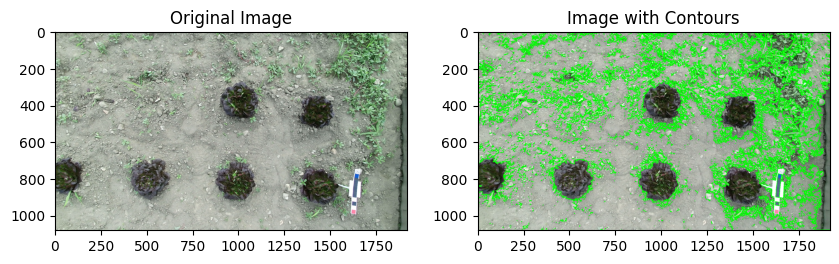

Number of plants in the image:  6015


In [ ]:
# Process a single image from the image folder and visualize the steps
img_path = os.path.join(img_folder, "2022-05-26 16:06:03.798000.png")
num_plants = process_image(img_path)

print("Number of plants in the image: ", num_plants)

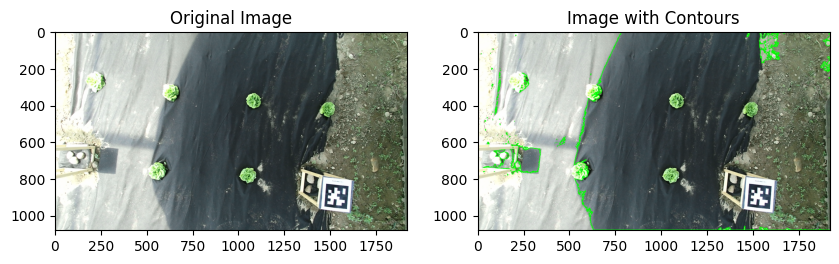

Number of plants in the image:  277


In [ ]:
# Process a single image from the image folder and visualize the steps checking the countour of image
img_path = os.path.join(img_folder, "2022-07-18 14:59:03.png")
num_plants = process_image(img_path)

print("Number of plants in the image: ", num_plants)

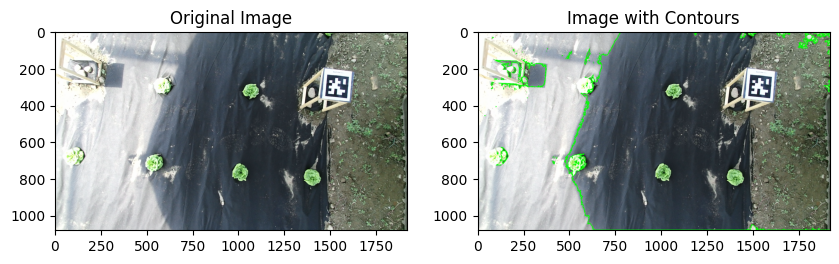

Number of plants in the image:  217


In [ ]:
#checking the contour for the other image 
# Process a single image from the image folder and visualize the steps checking the counter for other image
img_path = os.path.join(img_folder, "2022-07-18 15:00:31.png")
num_plants = process_image(img_path)

print("Number of plants in the image: ", num_plants)

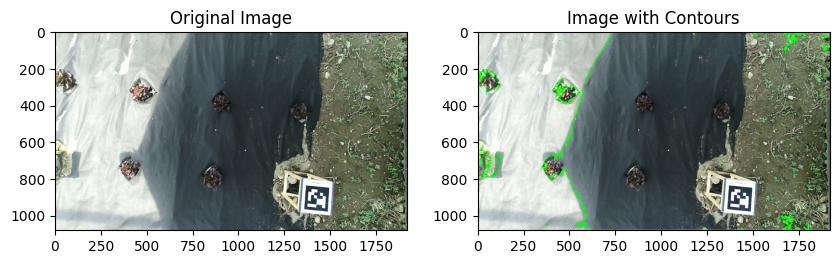

Number of plants in the image:  181


In [ ]:
#checking the contour for the other image 
# Process a single image from the image folder and visualize the steps checking the counter for other image
img_path = os.path.join(img_folder, "2022-07-18 15:04:53.png")
num_plants = process_image(img_path)

print("Number of plants in the image: ", num_plants)

Removing small objects and shadow which are not of interest for us

In [ ]:
# Load the image
img = cv2.imread('/content/drive/MyDrive/temp_images/2022-07-18 15:37:11.png')

Text(0.5, 1.0, 'Grayscale Image')

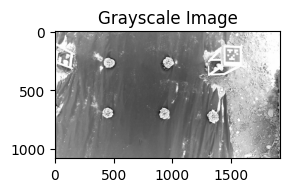

In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.title('Grayscale Image')

Text(0.5, 1.0, 'Blurred Image')

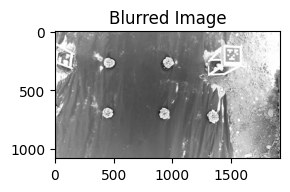

In [ ]:
# Apply a Gaussian blur to smooth out the image
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')

Text(0.5, 1.0, 'Binarized Image')

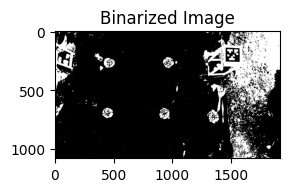

In [ ]:
# Apply a threshold to binarize the image
_, thresh = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.title('Binarized Image')


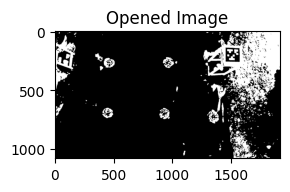

In [ ]:
# Apply morphological opening to remove small objects
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(opened, cv2.COLOR_BGR2RGB))
plt.title('Opened Image')

plt.show()

In [ ]:
# Apply morphological closing to fill holes
closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

In [ ]:
# Find contours in the image
contours, hierarchy = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


In [ ]:
# Filter out small contours
min_contour_area = 2000
contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

In [ ]:
# Draw the contours on the original image
result = img.copy()
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)


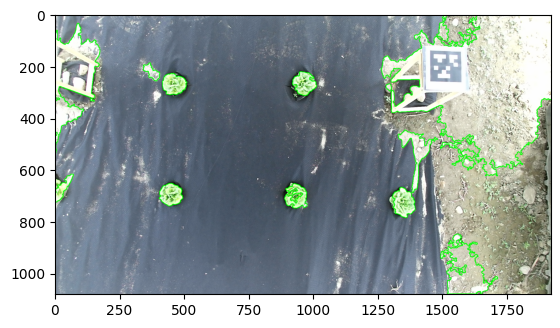

In [ ]:
# Display the result
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Print the number of plants
print("Number of plants:", len(contours))

Number of plants: 12


In [ ]:
# Filter out small contours
min_contour_area = 1000
contours = [c for c in contours if cv2.contourArea(c) > min_contour_area]

# Print the areas of the remaining contours
for c in contours:
    print(cv2.contourArea(c))

22414.5
7028.5
4601.5
5806.5
2842.0
2865.5
9124.5
5793.0
5549.5
2069.5
41394.0
246669.0


Trying Plantcv to perform the pre processing steps 

In [ ]:
pip install plantcv

In [ ]:
!pip uninstall matplotlib

In [ ]:
!pip install matplotlib==3.2.2

In [ ]:
import matplotlib as plt

In [ ]:
import cv2
from plantcv import plantcv as pcv


In [ ]:
# Load the image using PlantCV
img, path, filename = pcv.readimage("/content/drive/MyDrive/temp_images/2022-07-18 15:37:11.png")

In [ ]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 76.5 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plantcv 3.14.3 requires matplotlib<3.6,>=1.5, but you have matplotlib 3.7.1 which is incompatible.


In [ ]:
from matplotlib import pyplot as plt

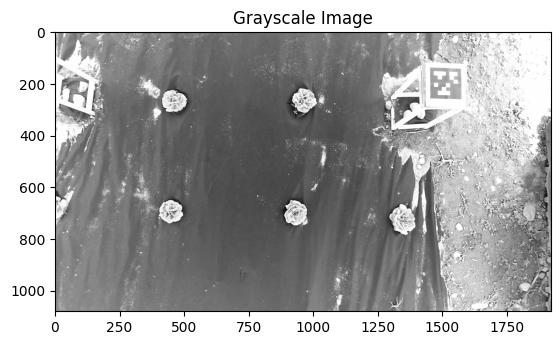

In [ ]:
# Convert the image to grayscale using PlantCV
gray_img = pcv.rgb2gray(img)
# Visualize the grayscale image
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.show()



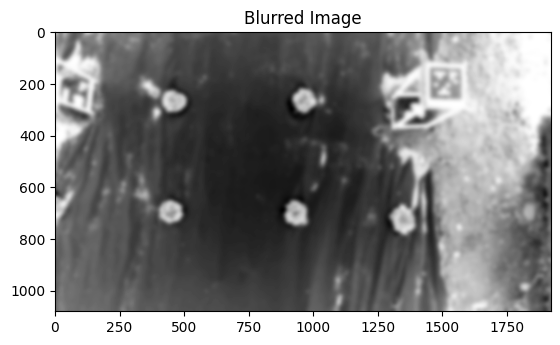

In [ ]:
# Apply a Gaussian blur to smooth out the image
# Apply a Gaussian blur to smooth out the image
blur_img = pcv.gaussian_blur(gray_img, ksize=(51,51))

# Visualize the blurred image
plt.imshow(blur_img, cmap='gray')
plt.title('Blurred Image')
plt.show()


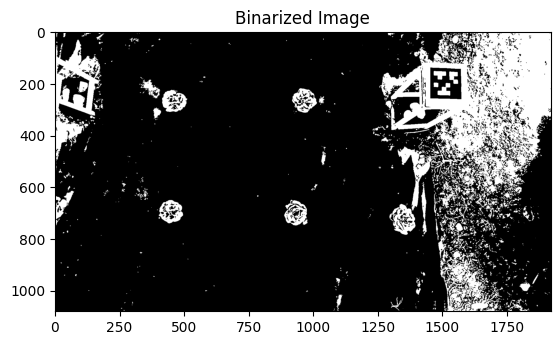

In [ ]:
# Apply a threshold to binarize the image
##Creates a binary image from a gray image based on the threshold values. The object target can be specified as dark or light.
binary_img = pcv.threshold.binary(gray_img, 200, 255, 'light')
# Visualize the binarized image
plt.imshow(binary_img, cmap='gray')
plt.title('Binarized Image')
plt.show()


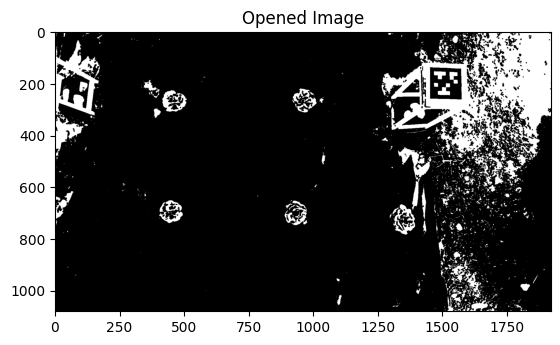

In [ ]:
# Apply morphological erosion to remove small objects
##Used to perform morphological erosion filtering. Helps remove isolated noise pixels or remove boundary of objects.
kernel = np.ones((5, 5), np.uint8)
eroded = pcv.erode(gray_img=binary_img, ksize=3, i=1)

# Visualize the opened image
plt.imshow(eroded, cmap='gray')
plt.title('Opened Image')
plt.show()

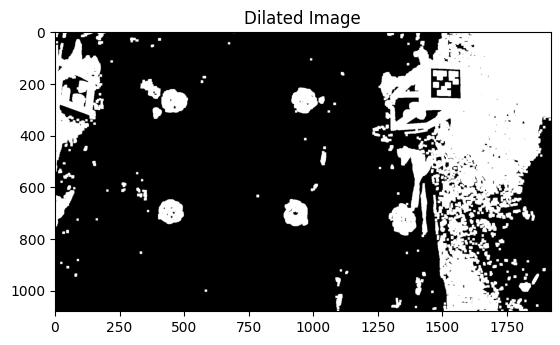

In [ ]:
# Apply morphological dilation to fill holes
dilated = pcv.dilate(gray_img=eroded, ksize = 9, i=1)
# Visualize the opened image
plt.imshow(dilated, cmap='gray')
plt.title('Dilated Image')
plt.show()

In [ ]:
# Read image
img, path, filename = pcv.readimage("/content/drive/MyDrive/temp_images/2022-07-18 15:37:11.png")

In [ ]:
# Set ROI (Region of Interest) coordinates
x = 250
y = 200
width = 500
height = 500


In [ ]:
# Create a binary mask of the ROI
roi_mask = np.zeros(img.shape[:2], np.uint8)
roi_mask[y:y+height, x:x+width] = 255


In [ ]:
# Apply the ROI to the original image
cropped_img = pcv.crop(img=img, x=250, y=200, h=1200, w=900)

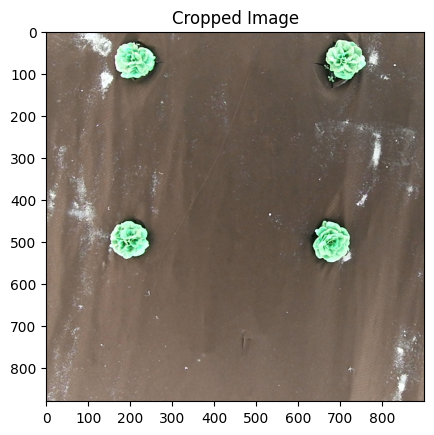

In [ ]:
# Visualize the opened image
plt.imshow(cropped_img, cmap='gray')
plt.title('Cropped Image')
plt.show()